# Airline Ticket Price || EDA || ML

Welcome to my notebook on Kaggle, where I present an in-depth analysis and predictive modeling for airline ticket prices. In this notebook, I conduct an exploratory data analysis (EDA) to uncover insights and patterns within the dataset. The dataset includes information such as airline, source city, departure time, number of stops, arrival time, destination city, flight class, duration, days left for booking, and price. Through visualizations and statistical analysis, I aim to understand the underlying trends and relationships in the data. Furthermore, I develop three predictive models—Linear Regression, Decision Tree Regressor, and Random Forest Regressor—to forecast the ticket prices based on various features. By comparing the performance of these models, I seek to determine the most effective approach for predicting airline ticket prices. Join me on this journey as we explore the fascinating world of airline data analysis and predictive modeling.

## Column Sammary

* **Airline**: Represents the name of the airline company operating the flight.
* **Source_city**: Denotes the city from which the flight departs.
* **Departure_time**: Indicates the time of day when the flight departs (e.g., Morning, Afternoon, Evening).
* **Stops**: Indicates the number of stops during the flight (e.g., zero for direct flights, one or more for flights with layovers).
* **Arrival_time**: Indicates the time of day when the flight arrives at its destination.
* **Destination_city**: Denotes the city to which the flight is destined.
* **Flight_class**: Specifies the class of the flight (e.g., Economy, Business).
* **Duration**: Represents the duration of the flight in hours.
* **Days_left**: Indicates the number of days left for booking the flight.
* **Price**: Represents the price of the flight ticket in the respective currency.

### Unveiling Insights: **Airline Ticket Price || EDA || ML**

Inquisitive Questions:
1. What are the distribution and frequency of different airlines in the dataset?
2. How does the departure time of flights vary throughout the day?
3. What is the distribution of flight durations across different routes?
4. Which airline offers the most competitive pricing for different routes?
5. How do flight prices vary between different source and destination cities?
6. How does the ticket price change with the number of days left before the flight?
7. Which airline has shortest duration?
8. Is there a dependency between the number of stops and the departure time?
9. How does the number of stops affect the flight duration for different airlines?
10. What is the impact of flight class on the frequency of flights for different airlines?



These questions will guide our journey through exploratory data analysis and predictive modeling, unraveling insights and uncovering patterns within the airline dataset.

## Importing The Necessary libraries

In [1]:
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical computing
from scipy.stats import ttest_ind # For t-tests
import matplotlib.pyplot as plt   # For creating plots
import seaborn as sns             # For visualization

from sklearn.preprocessing import LabelEncoder   # For label encoding categorical variables
from sklearn.preprocessing import MinMaxScaler  # For scaling numerical features
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.tree import DecisionTreeRegressor    # For decision tree regression modeling
from sklearn.ensemble import RandomForestRegressor  # For random forest regression modeling
from sklearn.metrics import r2_score               # For evaluating model performance (R-squared)
from sklearn.metrics import mean_absolute_error   # For evaluating model performance (Mean Absolute Error)
from sklearn.metrics import mean_squared_error    # For evaluating model performance (Mean Squared Error)
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.model_selection import GridSearchCV   # For hyperparameter tuning using grid search

import warnings   # For handling warnings
warnings.simplefilter('ignore')   # Ignore warnings for cleaner output

In [2]:
# Read a CSV file into a DataFrame
path = "/kaggle/input/airline-dataset/Clean_Dataset.csv"
data = pd.read_csv(path)

In [3]:
# Display the first few rows of the DataFrame
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# Display the last few rows of the DataFrame
data.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [5]:
# Get the dimensions of the DataFrame
data.shape

(300153, 12)

In [6]:
# Get the column names of the DataFrame
data.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [7]:
# Display concise summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
# Generate descriptive statistics of the DataFrame
# Transpose the result for better readability
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [9]:
# Check for missing values in each column of the DataFrame
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
# Check for duplicate rows in the DataFrame
# The duplicated() method returns a boolean Series indicating whether each row is a duplicate of a previous row.
# The sum() method is then used to count the number of True values, which represents the number of duplicate rows.
data.duplicated().sum()

0

In [11]:
# Remove the unwanted column
# Remove the 'Unnamed: 0' column from the DataFrame
# The drop() method is used to remove columns from the DataFrame. 
data.drop(columns='Unnamed: 0', inplace=True)

In [12]:
# Rename a column in the DataFrame to make it more understandable
# The rename() method is used to change the name of a column in the DataFrame.
# The 'columns' parameter specifies a dictionary where the keys are the current column names and the values are the new column names.
# Setting 'inplace=True' ensures that the operation modifies the DataFrame directly.
data.rename(columns={'class': 'flight_class'}, inplace=True)

## Univariate Analysis & Visualizations

In [13]:
# Print all columns and their indexes.
for index, value in enumerate(data.columns) :
    print(index+1, ":", value)

1 : airline
2 : flight
3 : source_city
4 : departure_time
5 : stops
6 : arrival_time
7 : destination_city
8 : flight_class
9 : duration
10 : days_left
11 : price


### 1) airline column

In [14]:
# Question 1: What are the distribution and frequency of different airlines in the dataset?

# Count the occurrences of each unique value in the 'airline' column
data.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

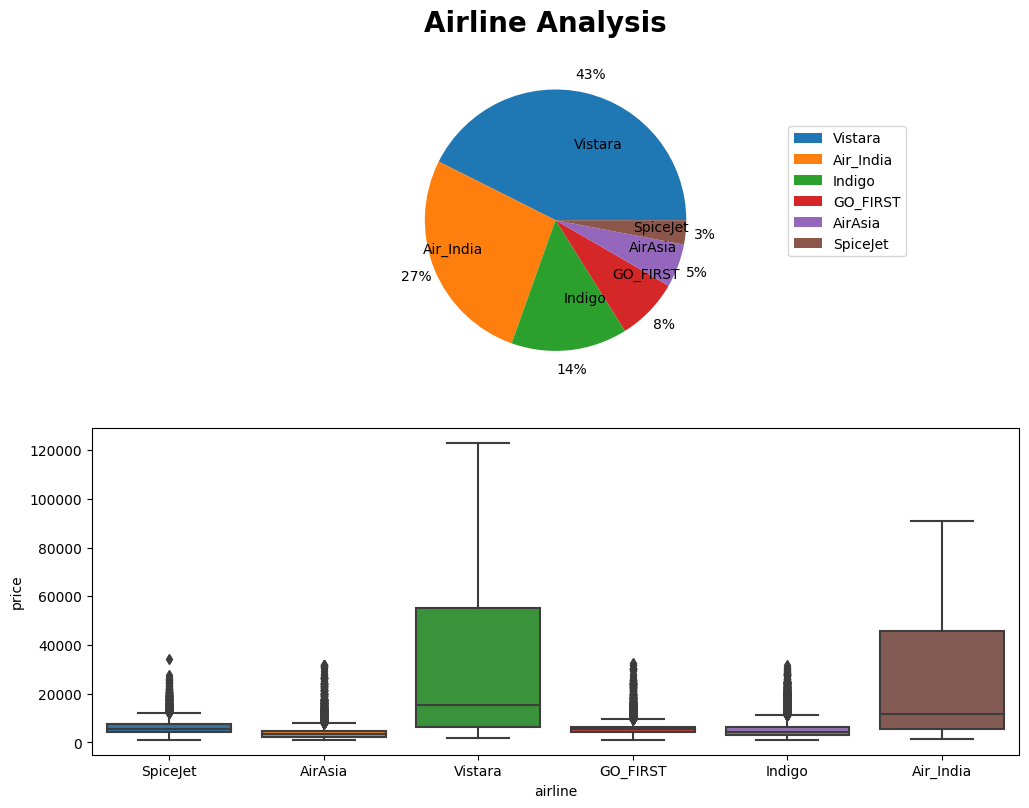

In [15]:
# Define custom colors for the pie chart
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create a subplot with 2 rows and 1 column
fig, ax = plt.subplots(2, 1, figsize=(10,8))

# Set the main title of the figure
fig.suptitle('Airline Analysis', fontsize=20, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Extract unique airline names as labels for the pie chart
labels = data.airline.value_counts().index.to_list()

# Plot a pie chart showing the distribution of airlines
ax[0].pie(data.airline.value_counts(), autopct='%.f%%', labels=labels, pctdistance=1.15, labeldistance=0.6)

# Add legend to the pie chart
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Create a boxplot showing the distribution of ticket prices for each airline
sns.boxplot(x='airline', y='price', data=data, ax=ax[1], palette=colors)

# Display the plot
plt.show()

* Most used airline is Vistara (43% of all flights, 127859 flights)
* Second place is Air_India (27% of all flights, 80892 flights)
* Less used airline is SpiceJet (3% of all flights, 9011 flights)

### 2) flight column

In [16]:
# Calculate the number of unique flight values in the 'flight' column of the dataset
len(data.flight.value_counts())

1561

*  Becase of larg values of unique values, i can not plot this column.
* Flight name is like a ID, so its not nessasary for modeling and will drop from dataframe.

In [17]:
# Remove the 'flight' column from the dataset
data.drop(columns='flight', inplace=True)

### 3) source_city column

In [18]:
# Count the occurrences of each unique source_city in the dataset
data.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

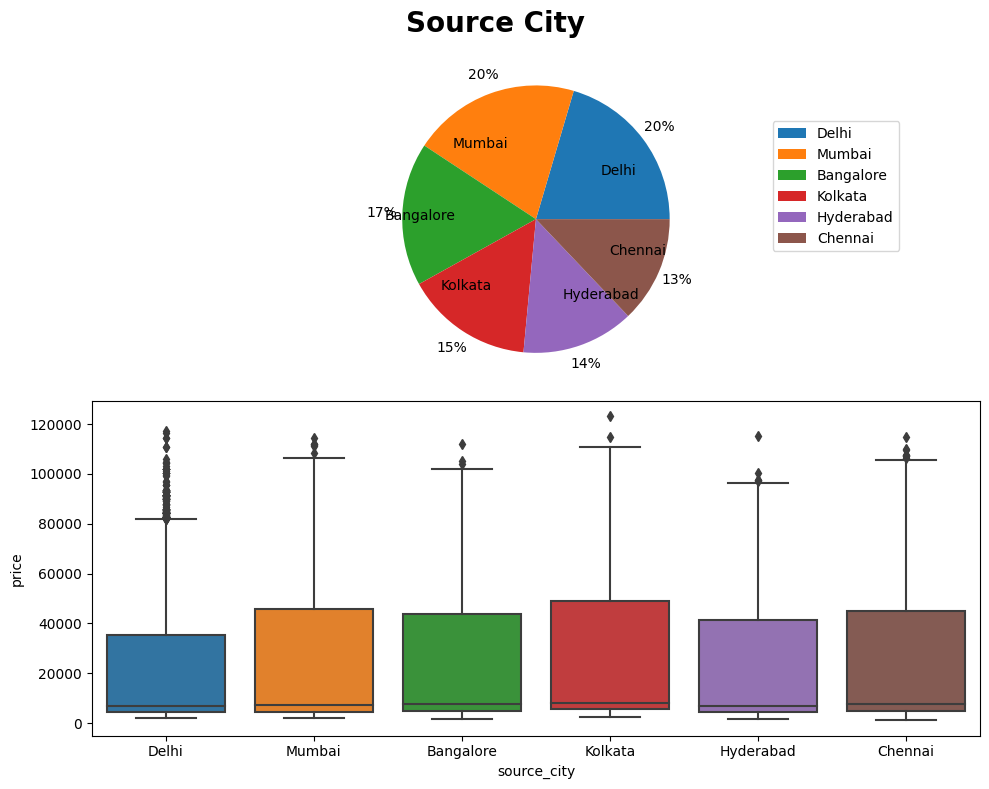

In [19]:
# Create a visualization to explore the distribution of prices based on source city
fig, ax = plt.subplots(2, 1, figsize=(10,8))  # Create subplots with 2 rows and 1 column
fig.suptitle('Source City', fontsize=20, fontweight='bold')  # Set the title of the figure

# Plot a pie chart showing the distribution of flights based on source city
labels = data.source_city.value_counts().index.to_list()  # Extract unique source cities
ax[0].pie(data.source_city.value_counts(), autopct='%.f%%', labels=labels, pctdistance=1.15, labeldistance=0.6)  # Plot pie chart
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)  # Add legend to the pie chart

# Plot a boxplot showing the distribution of prices based on source city
sns.boxplot(x='source_city', y='price', data=data, ax=ax[1], palette=colors)  # Plot boxplot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the visualization

* Delhi is the most sourced city with nuance
* Almost number of all flights source is equal.

### 4) departure_time column

In [20]:
# Question 2: How does the departure time of flights vary throughout the day?

# Count the occurrences of each unique departure_time in the dataset
data.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

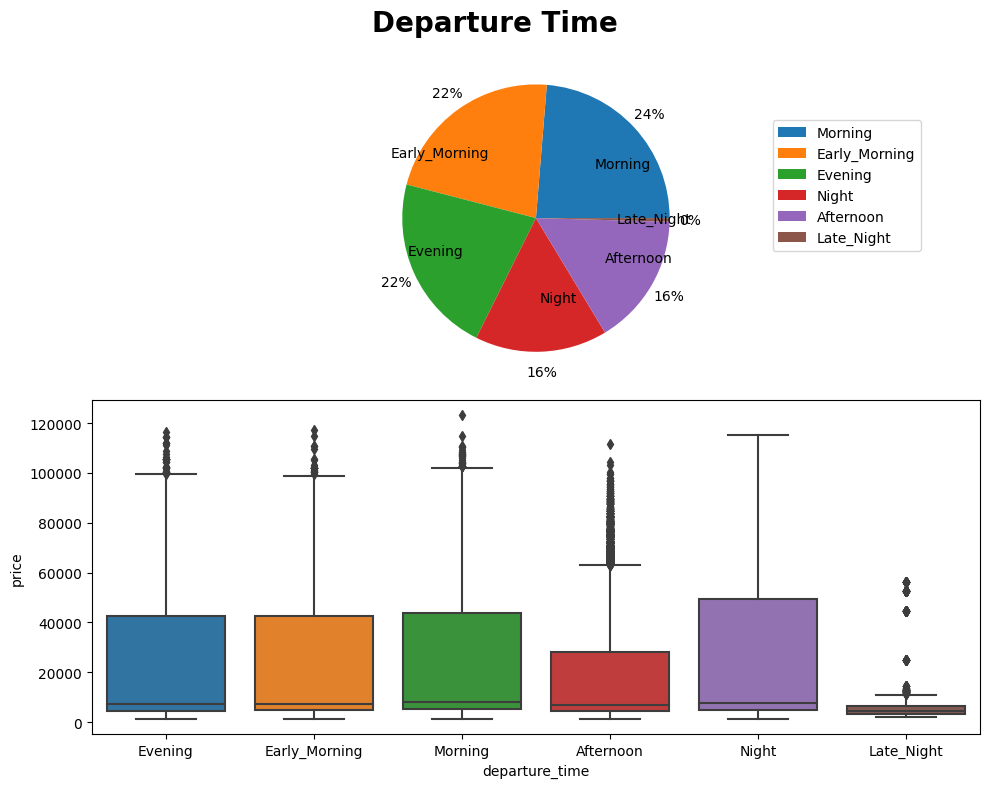

In [21]:
# Create a visualization to explore the distribution of prices based on departure time
fig, ax = plt.subplots(2, 1, figsize=(10,8))  # Create subplots with 2 rows and 1 column
fig.suptitle('Departure Time', fontsize=20, fontweight='bold')  # Set the title of the figure

# Plot a pie chart showing the distribution of flights based on departure time
labels = data.departure_time.value_counts().index.to_list()  # Extract unique departure times
ax[0].pie(data.departure_time.value_counts(), autopct='%.f%%', labels=labels, pctdistance=1.15, labeldistance=0.6)  # Plot pie chart
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)  # Add legend to the pie chart

# Plot a boxplot showing the distribution of prices based on departure time
sns.boxplot(x='departure_time', y='price', data=data, ax=ax[1], palette=colors)  # Plot boxplot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the visualization

* Morning is the most depature time with nuance
* Except at the end of Late_Night, the frequency of the rest of the departure_time is almost equal.

### 5) stops column

In [22]:
# Count the occurrences of each unique stops in the dataset
data.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

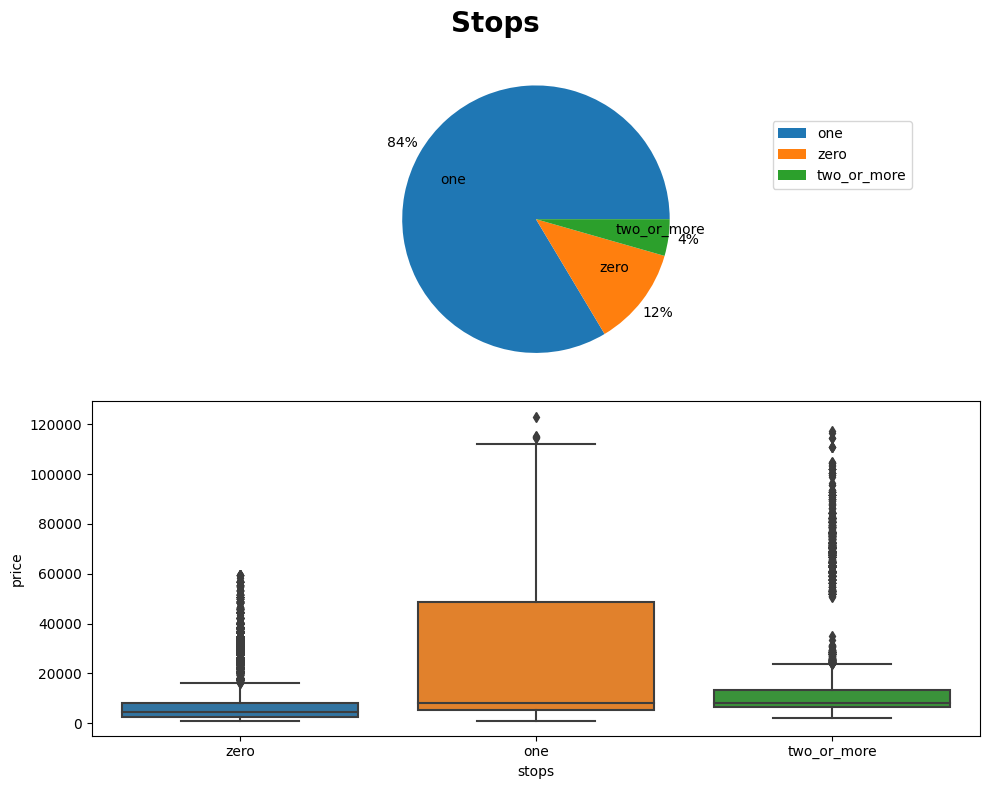

In [23]:
# Create a visualization to explore the distribution of prices based on the number of stops
fig, ax = plt.subplots(2, 1, figsize=(10,8))  # Create subplots with 2 rows and 1 column
fig.suptitle('Stops', fontsize=20, fontweight='bold')  # Set the title of the figure

# Plot a pie chart showing the distribution of flights based on the number of stops
labels = data.stops.value_counts().index.to_list()  # Extract unique stop values
ax[0].pie(data.stops.value_counts(), autopct='%.f%%', labels=labels, pctdistance=1.15, labeldistance=0.6)  # Plot pie chart
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)  # Add legend to the pie chart

# Plot a boxplot showing the distribution of prices based on the number of stops
sns.boxplot(x='stops', y='price', data=data, ax=ax[1], palette=colors)  # Plot boxplot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the visualization

* Most of the flights have 1 stop (about 84% , 250863 flights).
* Just 4% of flights have 2 or more than 2 stops during their flights.
* About 12% of flights have not any stop.(13286 flights)

### 6) arrival_time column

In [24]:
# Count the occurrences of each unique arrival_time in the dataset
data.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

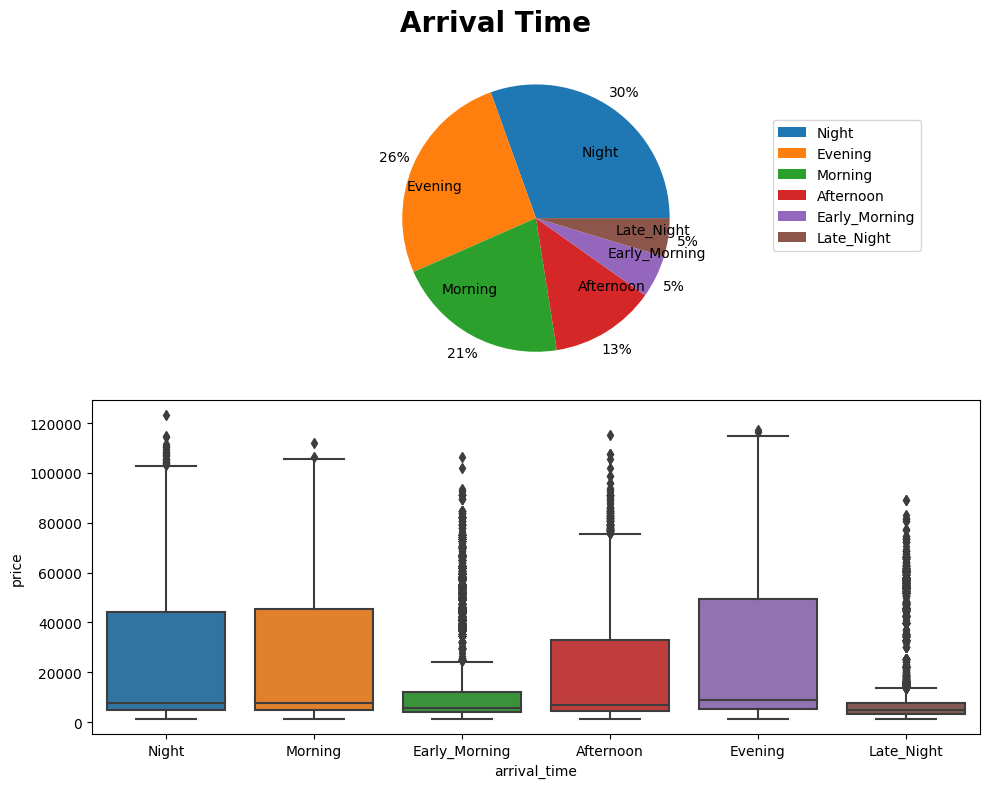

In [25]:
# Create a visualization to explore the distribution of prices based on arrival times
fig, ax = plt.subplots(2, 1, figsize=(10,8))  # Create subplots with 2 rows and 1 column
fig.suptitle('Arrival Time', fontsize=20, fontweight='bold')  # Set the title of the figure

# Plot a pie chart showing the distribution of flights based on arrival times
labels = data.arrival_time.value_counts().index.to_list()  # Extract unique arrival time values
ax[0].pie(data.arrival_time.value_counts(), autopct='%.f%%', labels=labels, pctdistance=1.15, labeldistance=0.6)  # Plot pie chart
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)  # Add legend to the pie chart

# Plot a boxplot showing the distribution of prices based on arrival times
sns.boxplot(x='arrival_time', y='price', data=data, ax=ax[1], palette=colors)  # Plot boxplot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the visualization

* Most flights arrived at Night

### 7) destination_city column

In [26]:
# Count the occurrences of each unique destination_city in the dataset
data.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

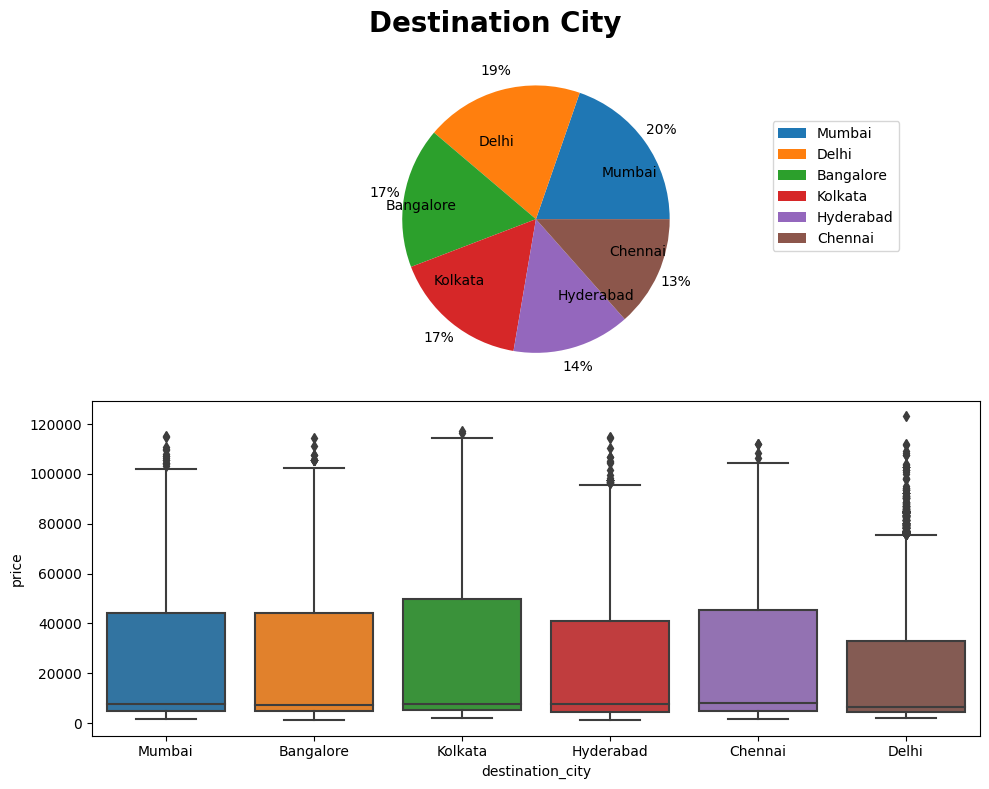

In [27]:
# Create a visualization to explore the distribution of prices based on destination cities
fig, ax = plt.subplots(2, 1, figsize=(10,8))  # Create subplots with 2 rows and 1 column
fig.suptitle('Destination City', fontsize=20, fontweight='bold')  # Set the title of the figure

# Plot a pie chart showing the distribution of flights based on destination cities
labels = data.destination_city.value_counts().index.to_list()  # Extract unique destination city values
ax[0].pie(data.destination_city.value_counts(), autopct='%.f%%', labels=labels, pctdistance=1.15, labeldistance=0.6)  # Plot pie chart
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)  # Add legend to the pie chart

# Plot a boxplot showing the distribution of prices based on destination cities
sns.boxplot(x='destination_city', y='price', data=data, ax=ax[1], palette=colors)  # Plot boxplot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the visualization

* Mumbai is the most destination city with nuance

### 8) flight_class column

In [28]:
# Count the occurrences of each unique flight_class in the dataset
data.flight_class.value_counts()

flight_class
Economy     206666
Business     93487
Name: count, dtype: int64

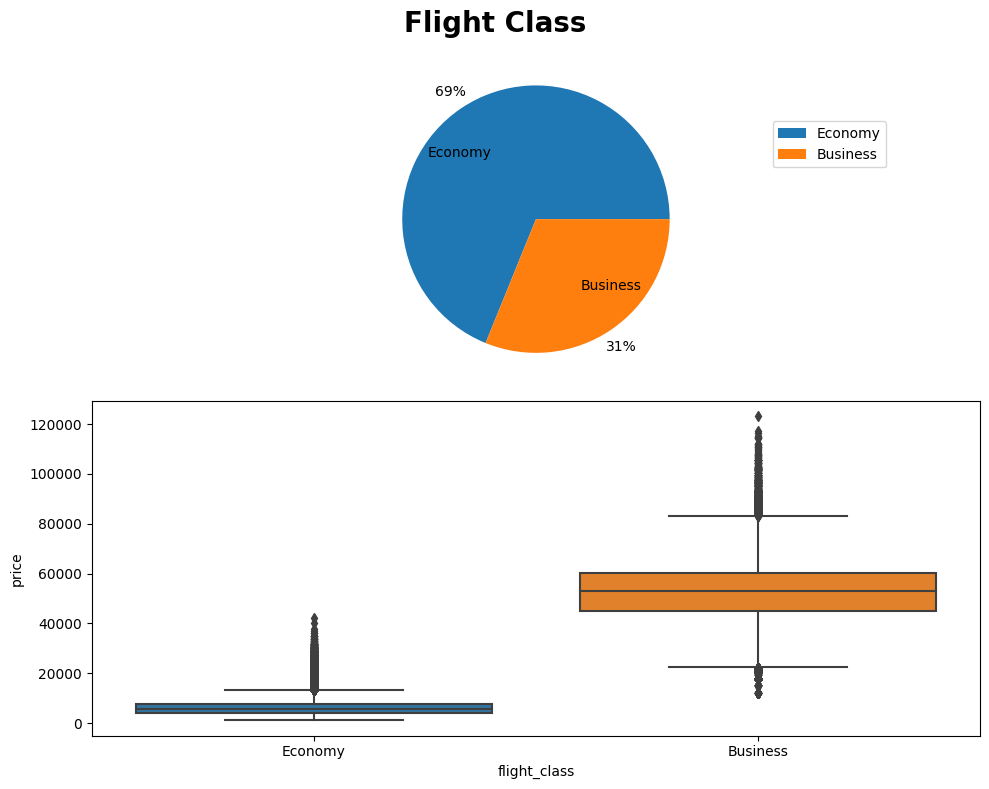

In [29]:
# Create a visualization to explore the distribution of prices based on flight classes
fig, ax = plt.subplots(2, 1, figsize=(10,8))  # Create subplots with 2 rows and 1 column
fig.suptitle('Flight Class', fontsize=20, fontweight='bold')  # Set the title of the figure

# Plot a pie chart showing the distribution of flights based on flight classes
labels = data.flight_class.value_counts().index.to_list()  # Extract unique flight class values
ax[0].pie(data.flight_class.value_counts(), autopct='%.f%%', labels=labels, pctdistance=1.15, labeldistance=0.6)  # Plot pie chart
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)  # Add legend to the pie chart

# Plot a boxplot showing the distribution of prices based on flight classes
sns.boxplot(x='flight_class', y='price', data=data, ax=ax[1], palette=colors)  # Plot boxplot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the visualization

* Abviously Business classes are more expesive than Economie .
* Most of flights are Economy (about 69%).

### 9) duration column

In [30]:
# Calculate the number of unique values in the 'duration' column
len(data.duration.value_counts())

476

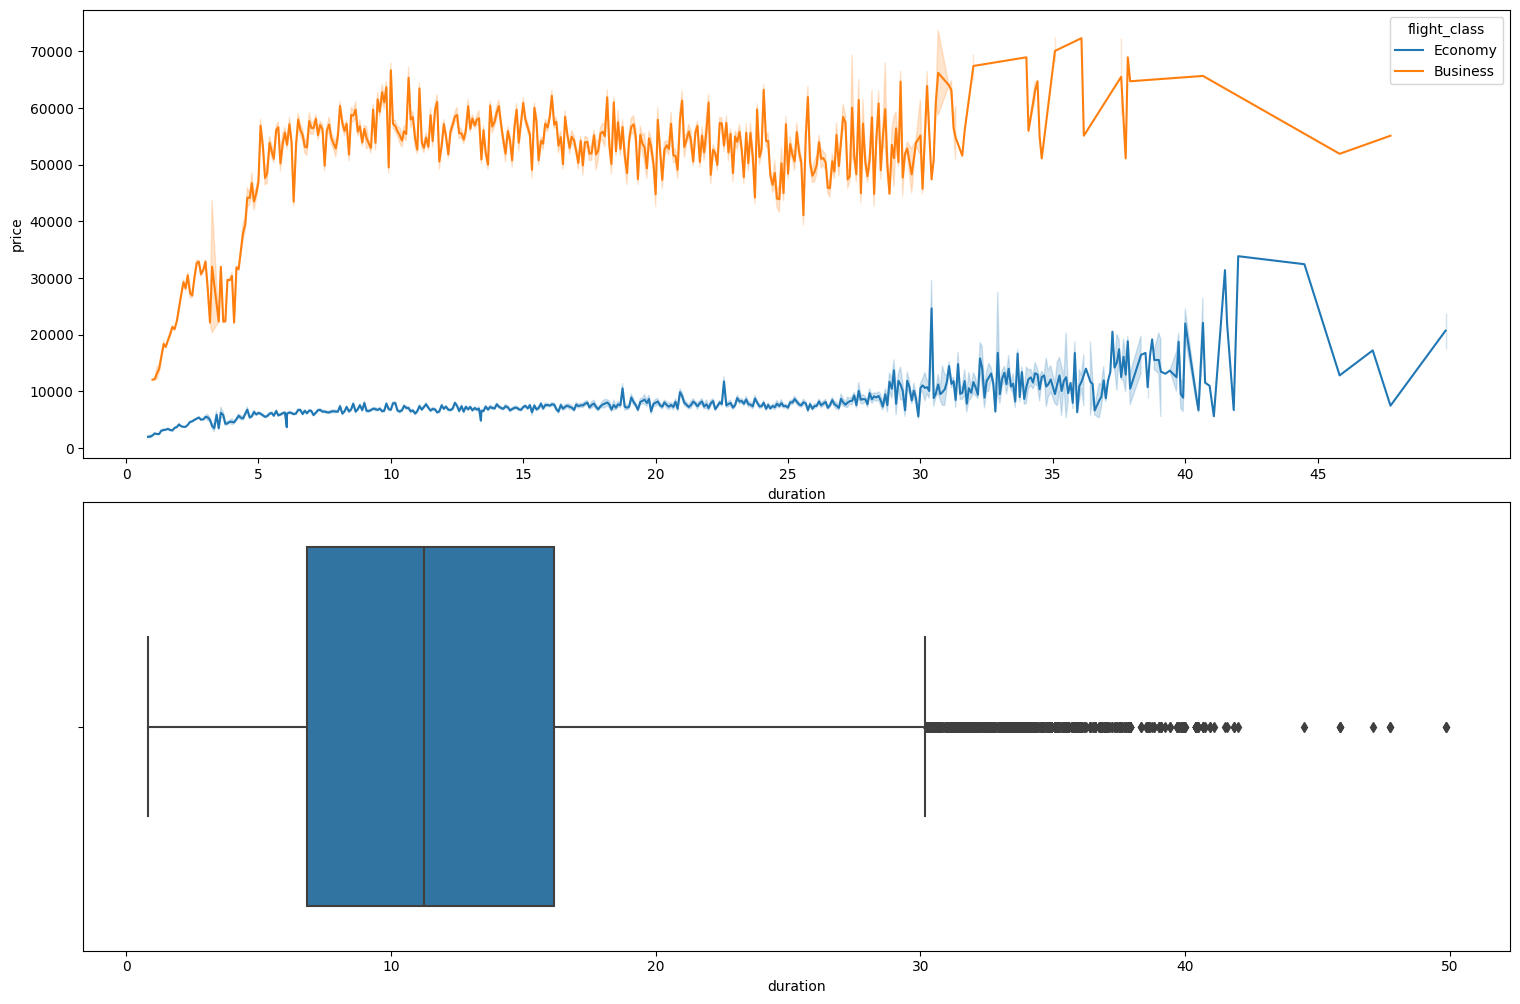

In [31]:
# Create subplots with two axes to visualize the relationship between duration and ticket price, and the distribution of durations

# Create a figure with 2 rows and 1 column, with a specified figure size
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

# Ensure tight layout to prevent overlapping of plot elements
plt.tight_layout()

# Plot a line plot showing the relationship between duration and ticket price, with different colors representing different flight classes
# Set x-axis ticks at intervals of 5
sns.lineplot(x='duration', y='price', data=data, ax=ax[0], hue='flight_class').set_xticks(np.arange(0, 50, 5))

# Plot a box plot to visualize the distribution of durations
sns.boxplot(data=data, x='duration', ax=ax[1])

# Display the plots
plt.show()

* In Business class, from 1 to 5 hours, price growth sharply.
* In Business class for durations more than 5, Price in a channel between 45000 to 60000.
* In Economy class growth of price have a linear growth and for duration=47 have a sharp raise in pricess.

### 10) days_left column

In [32]:
# Count the number of unique values in the 'days_left' column

# Calculate the number of unique values in the 'days_left' column using the value_counts() 
# function and getting the length of the resulting series
len(data.days_left.value_counts())

49

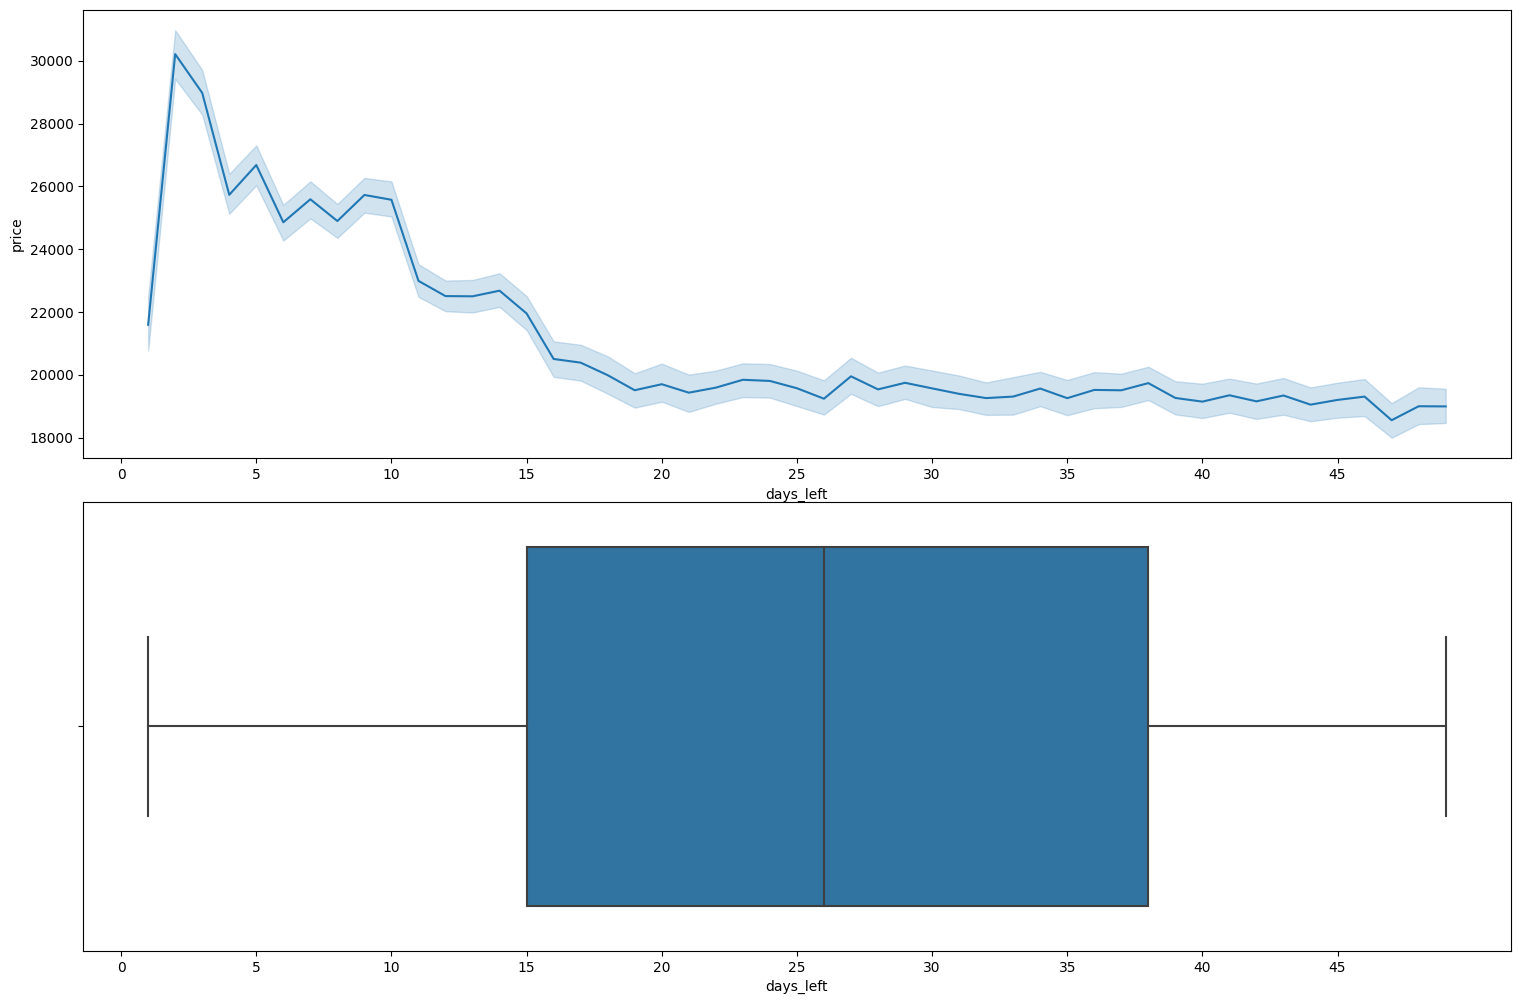

In [33]:
# Visualize the relationship between 'days_left' and 'price' using line plot and box plot

# Create a subplot with two rows and one column with a specific figure size
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

# Ensure tight layout
plt.tight_layout()

# Plot a line plot showing the relationship between 'days_left' and 'price' using seaborn's lineplot
# Set the x-ticks for better readability
sns.lineplot(x='days_left', y='price', data=data, ax=ax[0]).set_xticks(np.arange(0, 50, 5))

# Plot a box plot showing the distribution of 'price' across different values of 'days_left' using seaborn's boxplot
# Set the x-ticks for better readability
sns.boxplot(data=data, x='days_left', ax=ax[1]).set_xticks(np.arange(0, 50, 5))

# Display the plots
plt.show()

* The earlier you book your ticket, the less you will pay(for values greater than 2).

### 11) price column

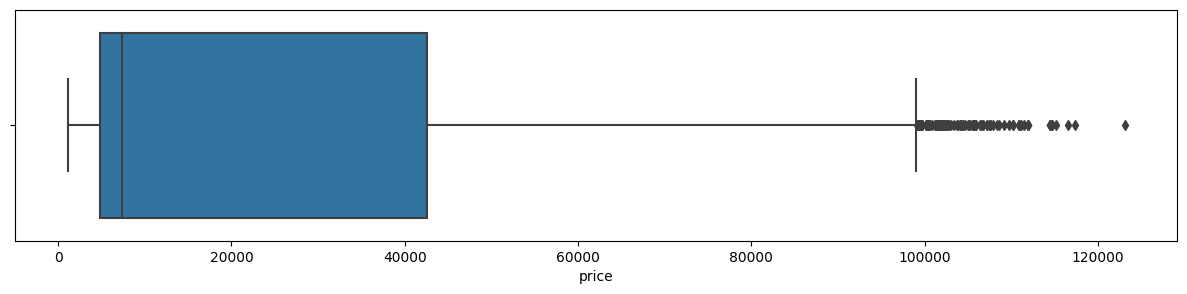

In [34]:
# Visualize the distribution of ticket prices using a box plot

# Create a figure with a specific size
plt.figure(figsize=(15, 3))

# Plot a box plot showing the distribution of prices using seaborn's boxplot
sns.boxplot(data=data, x='price')

# Display the plot
plt.show()

## Bivariate Analysis & Visualizations

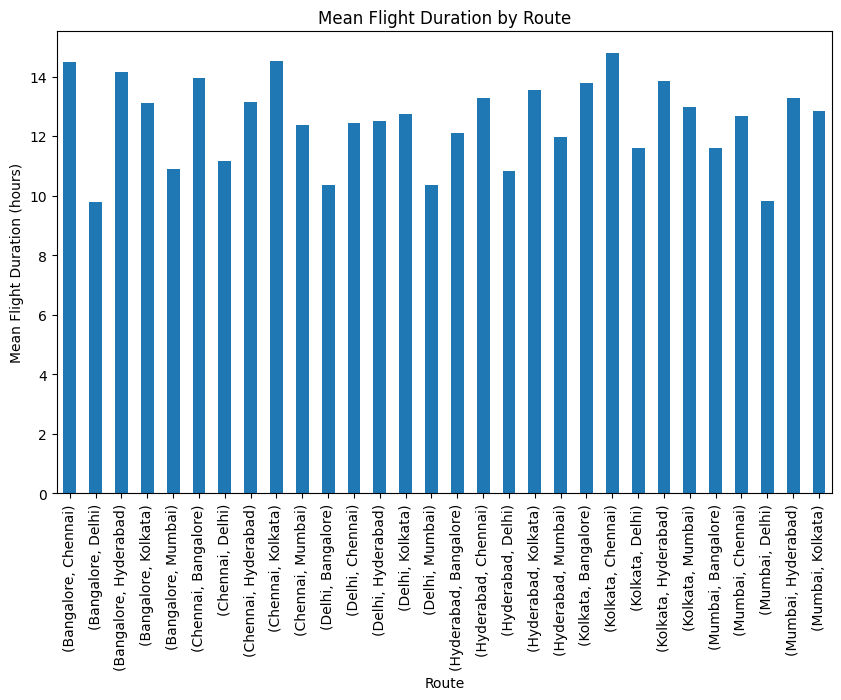

In [35]:
# Question 3: What is the distribution of flight durations across different routes?

# Group data by source and destination cities
duration_distribution = data.groupby(['source_city', 'destination_city'])['duration'].describe()

# Visualize the distribution of mean flight durations for different routes
duration_distribution['mean'].plot(kind='bar', figsize=(10, 6), title='Mean Flight Duration by Route')

# Set labels for x-axis and y-axis
plt.xlabel('Route')
plt.ylabel('Mean Flight Duration (hours)')

# Display the plot
plt.show()

* (Bangalore, Delhi) is the shortest filght duration
* (Kolkata, Chennai) is the longest flight duration

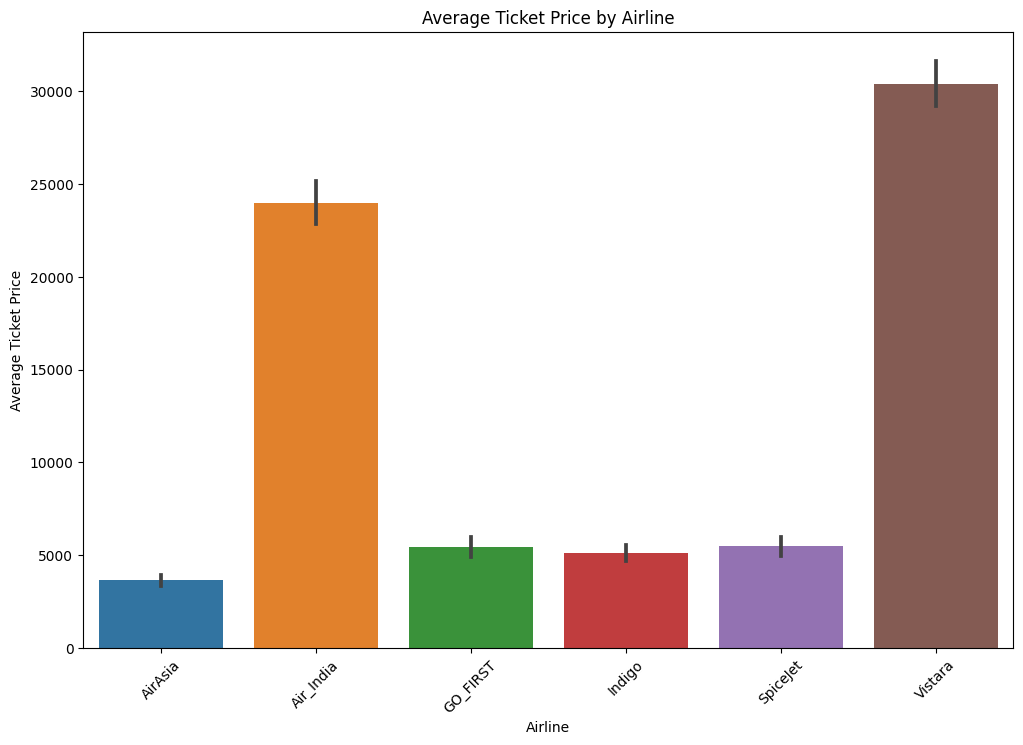

In [36]:
# Question 4: Which airline offers the most competitive pricing for different routes?

# Group data by airline and route and calculate the mean ticket price
pricing_by_airline = data.groupby(['airline', 'source_city', 'destination_city'])['price'].mean()

# Find the airline with the lowest average ticket price for each route
competitive_airlines = pricing_by_airline.groupby(['source_city', 'destination_city']).idxmin().apply(lambda x: x[0])

# Reset index to convert MultiIndex to DataFrame
pricing_by_airline = pricing_by_airline.reset_index()

# Visualize the average ticket price for different airlines using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='airline', y='price', data=pricing_by_airline)

# Set title for barplot
plt.title('Average Ticket Price by Airline')

# Set labels for x-axis and y-axis
plt.xlabel('Airline')
plt.ylabel('Average Ticket Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  

# Display the plot
plt.show()

* AirAisa has the lowest price 
* Vistara has the highest price

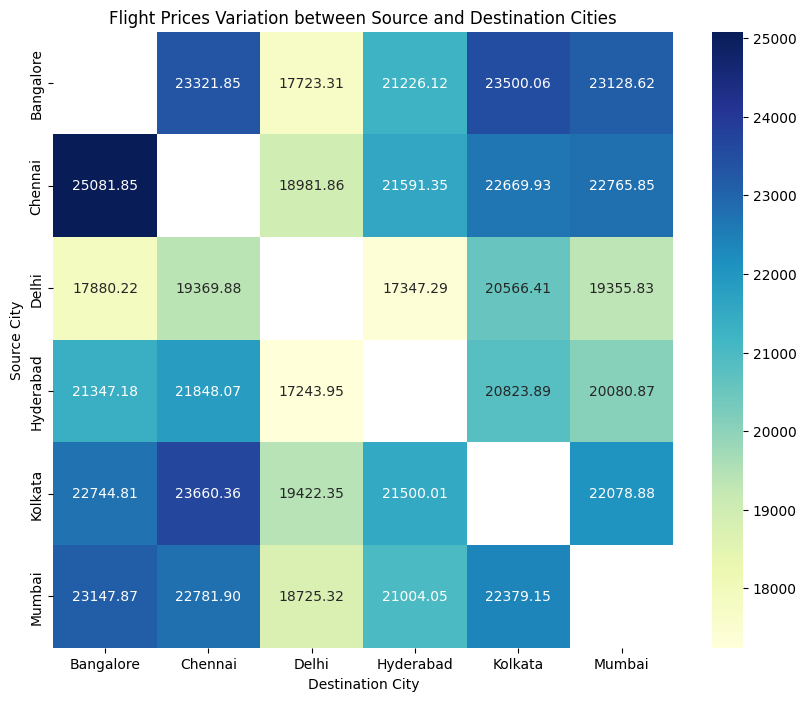

In [37]:
# Question 5: How do flight prices vary between different source and destination cities?

# Group the data by source and destination cities and calculate the mean price
price_variation = data.groupby(['source_city', 'destination_city'])['price'].mean().reset_index()

# Pivot the DataFrame to create a matrix of prices between source and destination cities
pivot_table = price_variation.pivot(index='source_city', columns='destination_city', values='price')

# Visualize the variation in flight prices using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f")

# Set title for the heatmap
plt.title('Flight Prices Variation between Source and Destination Cities')

# Set labels for x-axis and y-axis
plt.xlabel('Destination City')
plt.ylabel('Source City')

# Display the plot
plt.show()

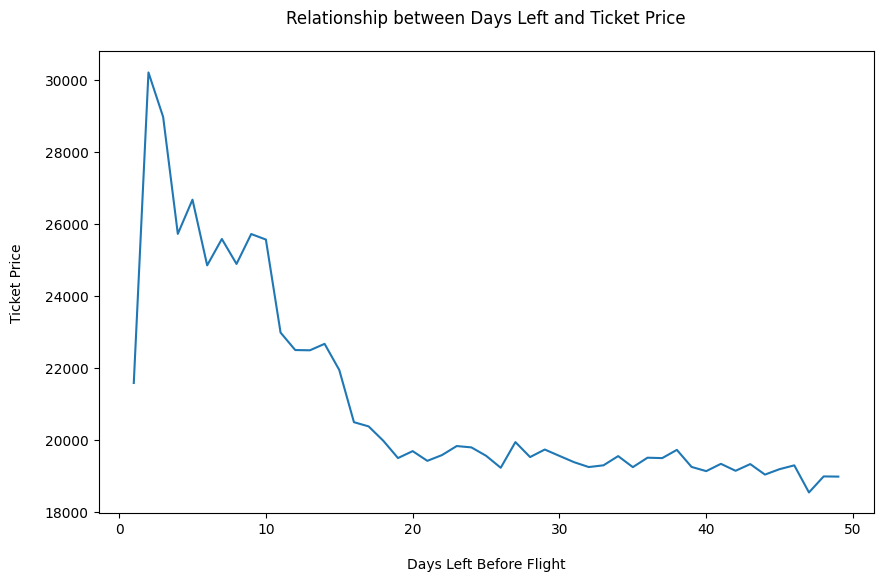

Correlation Coefficient between Days Left and Ticket Price: -0.09194853217143847


In [38]:
# Question 6: How does the ticket price change with the number of days left before the flight?

# Visualize the relationship between days left before the flight and ticket price
plt.figure(figsize=(10, 6))
sns.lineplot(x='days_left', y='price', data=data, ci=None)

# Set title for the lineplot
plt.title('Relationship between Days Left and Ticket Price', pad=20)

# Set labels for x-axis and y-axis
plt.xlabel('Days Left Before Flight', labelpad=15)
plt.ylabel('Ticket Price', labelpad=15)

# Display the plot
plt.show()

# Calculate the correlation coefficient between days left and ticket price
correlation_coefficient = data['days_left'].corr(data['price'])
print("Correlation Coefficient between Days Left and Ticket Price:", correlation_coefficient)

* There is a negative correlation indicates that as the number of days left before the flight increases, the ticket price tends to decrease as well, and vice versa

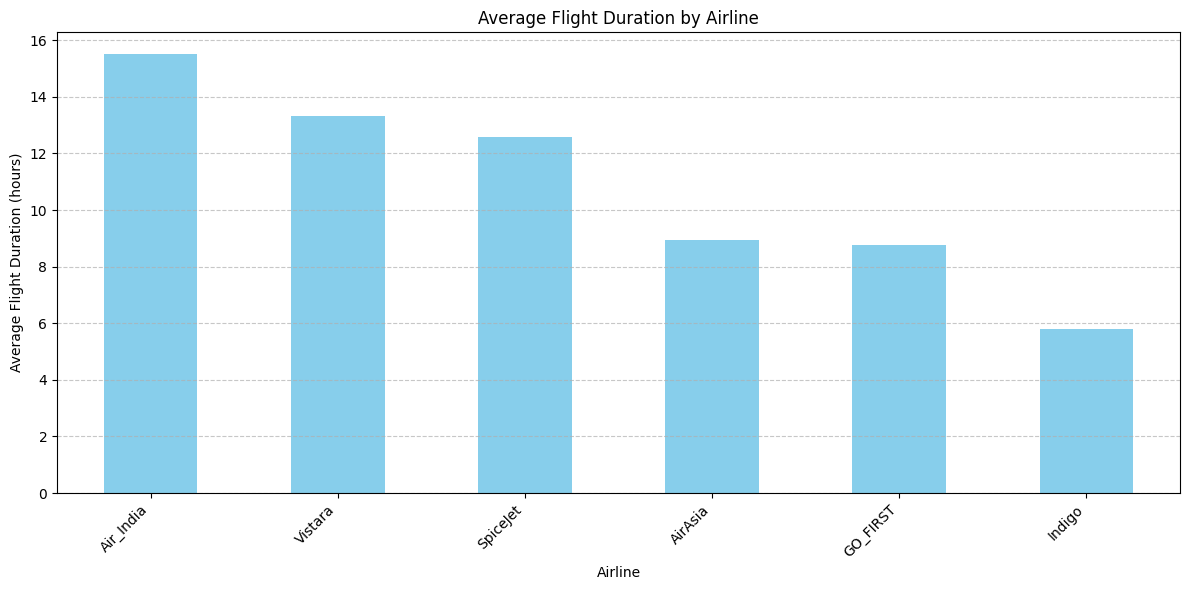

In [39]:
# Question 7: Which airline has shortest duration?

# Group the data by airline and calculate the mean flight duration
avg_duration_by_airline = data.groupby('airline')['duration'].mean().sort_values(ascending=False)

# Visualize the average flight duration for each airline using a bar plot
plt.figure(figsize=(12, 6))

# Plotting the bar chart
avg_duration_by_airline.plot(kind='bar', color='skyblue')

# Adding title and labels to the plot
plt.title('Average Flight Duration by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Flight Duration (hours)')

# Rotating and aligning x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid lines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout to prevent clipping of labels
plt.tight_layout()

# Displaying the plot
plt.show()

* Indigo has shortest duration
* Air_India has the longest duration 

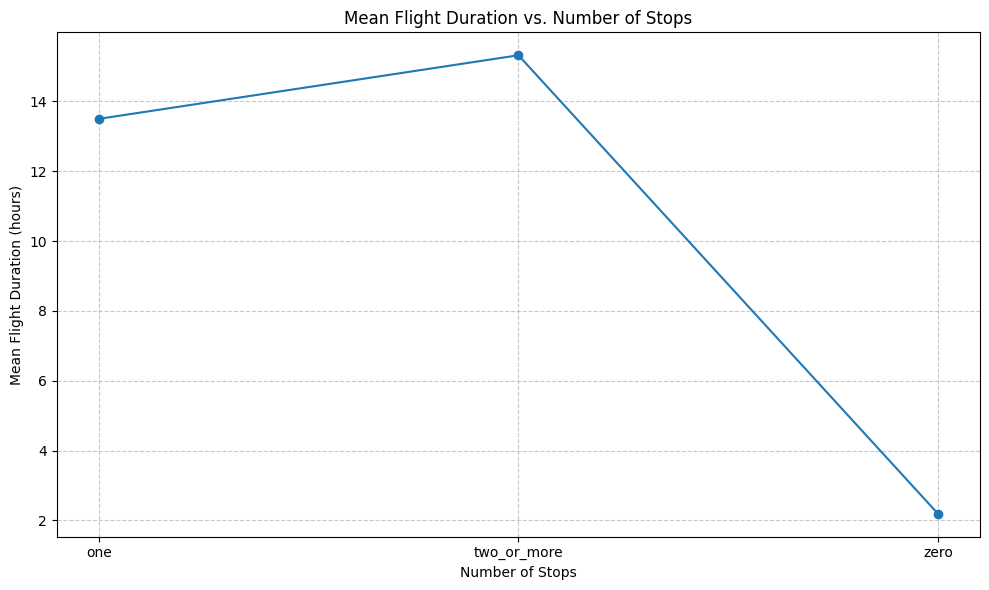

In [40]:
# Question 8: Is there a dependency between the number of stops and the duration?

# Group the data by the number of stops and calculate the mean duration
mean_duration_by_stops = data.groupby('stops')['duration'].mean()

# Visualize the relationship between the number of stops and the mean duration using a line plot
plt.figure(figsize=(10, 6))

# Plotting the mean duration against the number of stops
plt.plot(mean_duration_by_stops, marker='o', linestyle='-')

# Adding title and labels to the plot
plt.title('Mean Flight Duration vs. Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Mean Flight Duration (hours)')

# Setting x-ticks to match the number of stops
plt.xticks(mean_duration_by_stops.index)

# Adding grid lines for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Adjusting layout to prevent label clipping
plt.tight_layout()

# Displaying the plot
plt.show()

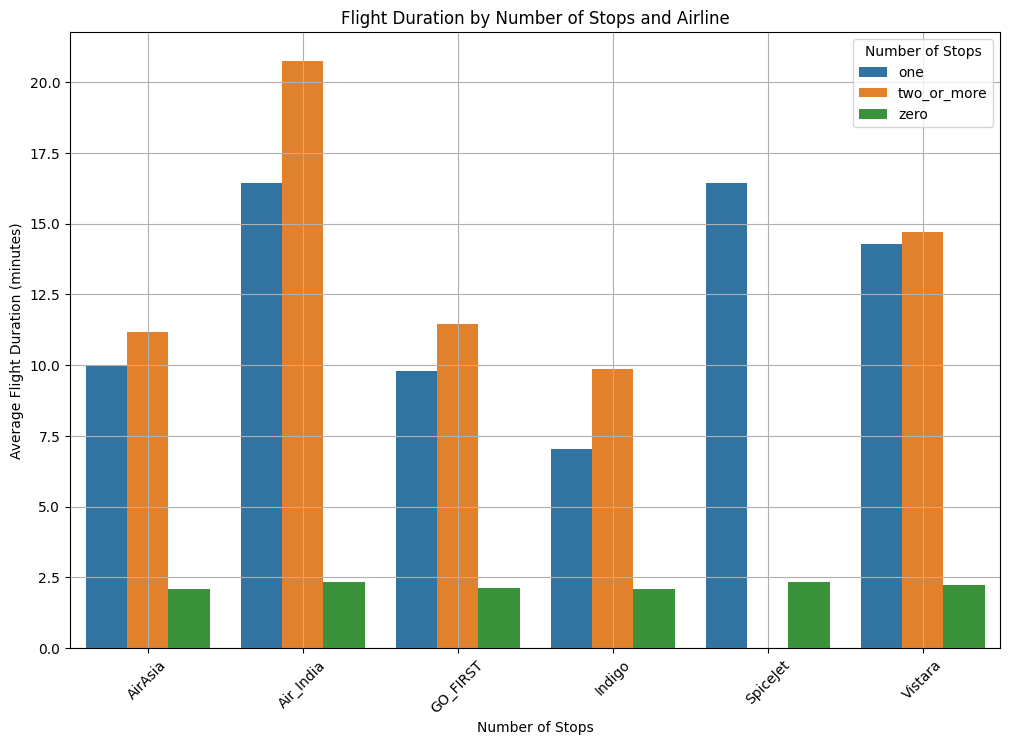

In [41]:
# Question 9: How does the number of stops affect the flight duration for different airlines?

# Group data by the number of stops and airline, and calculate the mean flight duration
flight_duration_by_stops_airline = data.groupby(['stops', 'airline'])['duration'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Creating a grouped bar plot to visualize flight duration by number of stops and airline
sns.barplot(x='airline', y='duration', hue='stops', data=flight_duration_by_stops_airline)

# Adding title and labels to the plot
plt.title('Flight Duration by Number of Stops and Airline')
plt.xlabel('Number of Stops')
plt.ylabel('Average Flight Duration (minutes)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend with a title
plt.legend(title='Number of Stops')

# Adding grid lines for reference
plt.grid(True)

# Displaying the plot
plt.show()

* The affect is the same on every airlines(except Spicejet maybe because it has flight with two or more stops) which is when the stops increase the duration also increase and vice versa

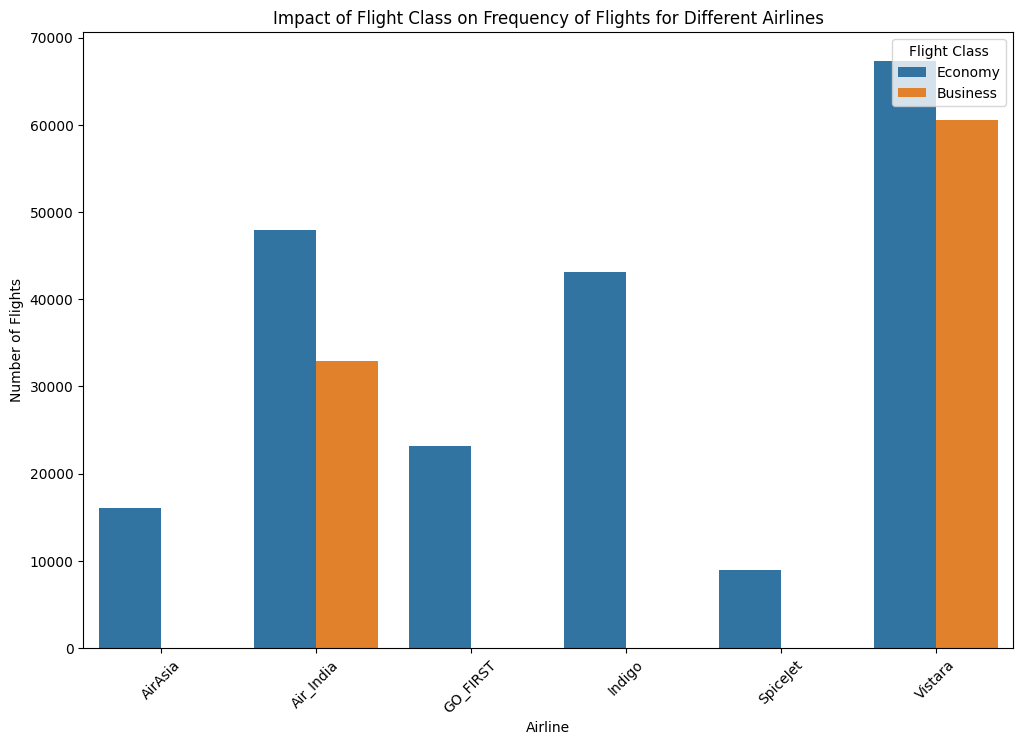

In [42]:
# Question 10: What is the impact of flight class on the frequency of flights for different airlines?

# Group data by airline and flight class and count flights
flight_count_by_airline_class = data.groupby(['airline', 'flight_class']).size().reset_index(name='flight_count')

# Visualize the impact of flight class on the frequency of flights for different airlines
plt.figure(figsize=(12, 8))

# Creating a grouped bar plot to show the impact of flight class on flight frequency for different airlines
sns.barplot(x='airline', y='flight_count', hue='flight_class', data=flight_count_by_airline_class)

# Adding title and labels to the plot
plt.title('Impact of Flight Class on Frequency of Flights for Different Airlines')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend with a title
plt.legend(title='Flight Class')

# Displaying the plot
plt.show()

* In every every airline company the economy class has sold more tickets 

## EDA Conclusions

1. **Airline Usage**:
   - Vistara emerges as the most frequently used airline, accounting for 43% of all flights, followed by Air India at 27%, and SpiceJet at 3%.
   - This suggests a dominance of Vistara in the market, followed by Air India, with SpiceJet having a comparatively smaller market share.

2. **Source and Destination Cities**:
   - Delhi serves as the most common source city for flights, with a notable frequency.
   - The distribution of flights across source cities is relatively balanced, indicating a widespread origin of flights.
   - Similarly, Mumbai stands out as the most common destination city, suggesting a high demand for flights to this location.

3. **Departure and Arrival Times**:
   - Flights predominantly depart during the morning hours, with a consistent frequency throughout the day.
   - Most flights arrive at night, potentially reflecting travel patterns and airport operations.

4. **Flight Class and Pricing**:
   - Business class tickets generally command higher prices compared to Economy class tickets.
   - Business class fares exhibit a sharp increase in prices for durations between 1 to 5 hours, while Economy class prices show a more linear growth pattern.
   - The majority of flights are in the Economy class, indicating a preference for cost-effective travel options.

5. **Booking Timing and Ticket Price**:
   - There's a negative correlation between the number of days left before the flight and ticket prices, suggesting that booking earlier may result in lower fares.

6. **Flight Durations and Airlines**:
   - AirAsia offers the shortest flight durations, while Air India tends to have longer durations.
   - The number of stops in a flight correlates positively with its duration across all airlines, except for SpiceJet, which may offer flights with multiple stops.

7. **Flight Class Preference**:
   - Economy class tickets are the most commonly sold across all airline companies, indicating a higher demand for budget-friendly travel options.

By consolidating these insights, we gain a comprehensive understanding of the dynamics within the airline industry, including traveler preferences, pricing strategies, and market trends.

## Label Encoding

In [43]:
categorical = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'flight_class']

# Print unique values of categorical columns before Label Encoding
print('Unique Values Before Label Encoding\n')
for cat_col in categorical:
    print(cat_col, ' : ', pd.unique(data[cat_col]),'\n')

Unique Values Before Label Encoding

airline  :  ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India'] 

source_city  :  ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'] 

departure_time  :  ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'] 

stops  :  ['zero' 'one' 'two_or_more'] 

arrival_time  :  ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night'] 

destination_city  :  ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi'] 

flight_class  :  ['Economy' 'Business'] 



In [44]:
# Encode categorical variables using LabelEncoder
temp_airline = LabelEncoder()
data['airline'] = temp_airline.fit_transform(data['airline'])

temp_source_city = LabelEncoder()
data['source_city'] = temp_source_city.fit_transform(data['source_city'])

temp_departure_time = LabelEncoder()
data['departure_time'] = temp_departure_time.fit_transform(data['departure_time'])

temp_stops = LabelEncoder()
data['stops'] = temp_stops.fit_transform(data['stops'])

temp_arrival_time = LabelEncoder()
data['arrival_time'] = temp_arrival_time.fit_transform(data['arrival_time'])

temp_destination_city = LabelEncoder()
data['destination_city'] = temp_destination_city.fit_transform(data['destination_city'])

temp_flight_class = LabelEncoder()
data['flight_class'] = temp_flight_class.fit_transform(data['flight_class'])

In [45]:
# Print unique values of categorical columns before Label Encoding
print('Unique Values After Label Encoding\n')
for cat_col in categorical:
    print(cat_col, ' : ', pd.unique(data[cat_col]),'\n')

Unique Values After Label Encoding

airline  :  [4 0 5 2 3 1] 

source_city  :  [2 5 0 4 3 1] 

departure_time  :  [2 1 4 0 5 3] 

stops  :  [2 0 1] 

arrival_time  :  [5 4 1 0 2 3] 

destination_city  :  [5 0 4 3 1 2] 

flight_class  :  [1 0] 



In [46]:
# Generate descriptive statistics and apply styling for better visualization
data.describe().loc[['min', 'std', '50%', 'mean', 'max']].T.style.background_gradient(axis=1)

,min,std,50%,mean,max
airline,0.000000,1.833265,3.000000,3.104873,5.000000
source_city,0.000000,1.751762,2.000000,2.577592,5.000000
departure_time,0.000000,1.754276,2.000000,2.417337,5.000000
stops,0.000000,0.665825,0.000000,0.284168,2.000000
arrival_time,0.000000,1.741666,4.000000,3.074086,5.000000
destination_city,0.000000,1.744543,3.000000,2.588303,5.000000
flight_class,0.000000,0.463093,1.000000,0.688536,1.000000
duration,0.830000,7.191997,11.250000,12.221021,49.830000
days_left,1.000000,13.561004,26.000000,26.004751,49.000000
price,1105.000000,22697.767366,7425.000000,20889.660523,123071.000000


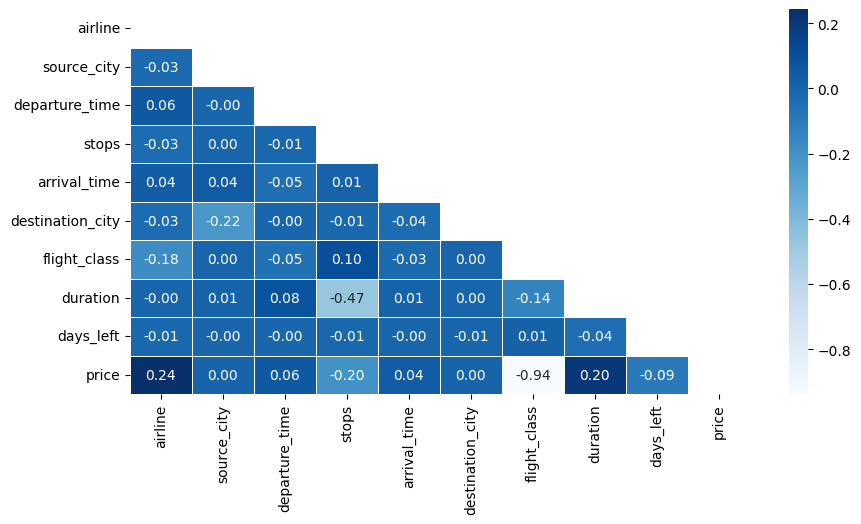

In [47]:
# Calculate the correlation matrix between numerical features
corr = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', 
            mask=np.triu(corr), cmap='Blues')

# Display the plot
plt.show()

* Flight classes is most relevant feature to Price.

## Train-Test Ssplit

In [48]:
# Separate the features (X) and target variable (y)
X_temp = data.drop(columns='price')  # Features (independent variables)
y = data.price  # Target variable (dependent variable)

## Normalization

In [49]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()  # Initialize MinMaxScaler
scaled_features = scaler.fit_transform(X_temp)  # Fit and transform the features
X = pd.DataFrame(scaled_features, columns=X_temp.columns)  # Convert the scaled features back to a DataFrame

In [50]:
# Generate descriptive statistics for the scaled features
X.describe().loc[['min', 'std', '50%', 'mean', 'max']].T.style.background_gradient(axis=1)

,min,std,50%,mean,max
airline,0.000000,0.366653,0.600000,0.620975,1.000000
source_city,0.000000,0.350352,0.400000,0.515518,1.000000
departure_time,0.000000,0.350855,0.400000,0.483467,1.000000
stops,0.000000,0.332912,0.000000,0.142084,1.000000
arrival_time,0.000000,0.348333,0.800000,0.614817,1.000000
destination_city,0.000000,0.348909,0.600000,0.517661,1.000000
flight_class,0.000000,0.463093,1.000000,0.688536,1.000000
duration,0.000000,0.146775,0.212653,0.232470,1.000000
days_left,0.000000,0.282521,0.520833,0.520932,1.000000


In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Print the shapes of the training and testing sets
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (240122, 9)
x test:  (60031, 9)
y train:  (240122,)
y test:  (60031,)


## Training The Models

### Linear Regression

In [52]:
# Instantiate and fit a Linear Regression model
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Make predictions on the test set using the trained Linear Regression model
reg_pred_test = LinearRegression_model.predict(X_test)

In [54]:
# Calculate evaluation metrics for the Linear Regression model
print('Mean Absolute Error for Linear Regression model : {:.4f}'.format(mean_absolute_error(y_test, reg_pred_test))) 
print('Mean Squared Error for Linear Regression model : {:.4f}'.format(mean_squared_error(y_test, reg_pred_test)))  
print('R2Score for Linear Regression model : {:.4f}'.format(r2_score(y_test, reg_pred_test)))  

Mean Absolute Error for Linear Regression model : 4624.4722
Mean Squared Error for Linear Regression model : 48547659.8515
R2Score for Linear Regression model : 0.9052


### Decision Tree Regressor

In [55]:
# Instantiate and train a Decision Tree Regression model
DecisionTree_model= DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [56]:
# Make predictions using the trained Decision Tree Regression model
dec_pred_test = DecisionTree_model.predict(X_test)

In [57]:
# Print evaluation metrics for the Decision Tree Regression model
print('Mean Absolute Error for Decision Tree Regressor model : {:.4f}'.format(mean_absolute_error(y_test, dec_pred_test))) 
print('Mean Squared Error for Decision Tree Regressor model : {:.4f}'.format(mean_squared_error(y_test, dec_pred_test)))  
print('R2Score for Decision Tree Regressor model : {:.4f}'.format(r2_score(y_test, dec_pred_test)))  

Mean Absolute Error for Decision Tree Regressor model : 1152.4411
Mean Squared Error for Decision Tree Regressor model : 11910601.7763
R2Score for Decision Tree Regressor model : 0.9768


### Random Forest Regressor

In [58]:
# Train the Random Forest Regression model
RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
# Make predictions using the trained Random Forest Regression model
ran_pred_test = RandomForest_model.predict(X_test)

In [60]:
# Print evaluation metrics for the Random Forest Regressor
print('Mean Absolute Error for Random Forest Regressor model : {:.4f}'.format(mean_absolute_error(y_test, ran_pred_test))) 
print('Mean Squared Error for Random Forest Regressor model : {:.4f}'.format(mean_squared_error(y_test, ran_pred_test)))  
print('R2Score for Random Forest Regressor model : {:.4f}'.format(r2_score(y_test, ran_pred_test)))  

Mean Absolute Error for Random Forest Regressor model : 1069.6794
Mean Squared Error for Random Forest Regressor model : 7355020.6224
R2Score for Random Forest Regressor model : 0.9856


## Comparison between Models result

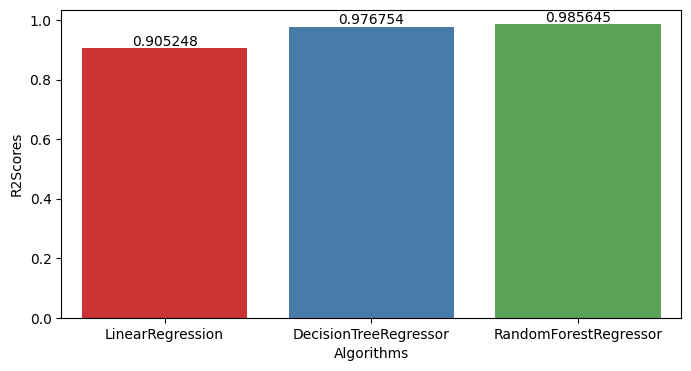

In [61]:
# Create a DataFrame to store the R2 scores of different regression algorithms
result = pd.DataFrame({
    'Algorithms': ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],
    'R2Scores': [r2_score(y_test, reg_pred_test), r2_score(y_test, dec_pred_test), r2_score(y_test, ran_pred_test)]
})

# Plotting the R2 scores for different regression algorithms
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Algorithms', y='R2Scores', data=result, palette='Set1')

# Adding labels to the bars indicating the R2 scores
for container in ax.containers:
    ax.bar_label(container)

# Display the plot
plt.show()